In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [15]:
img = cv2.imread("pyramid.jpg", 0)

In [16]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [17]:
magnitude_spectrum = 20*np.log((cv2.magnitude(dft_shift[:, :,0], dft_shift[:,:,1])))

## High Pass Filter Mask

In [18]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/ 2)

In [31]:
mask = np.ones((rows, cols, 2), np.uint8)
r = 60
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
mask[mask_area] = 0

In [32]:
mask_area

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
fshift = dft_shift * mask

In [34]:
epsilon = 1e-8  # A small value to avoid division by zero
fshift_mask_mag = 2000 * np.log(np.abs(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])) + epsilon)

In [35]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :,0], img_back[:, :, 1])

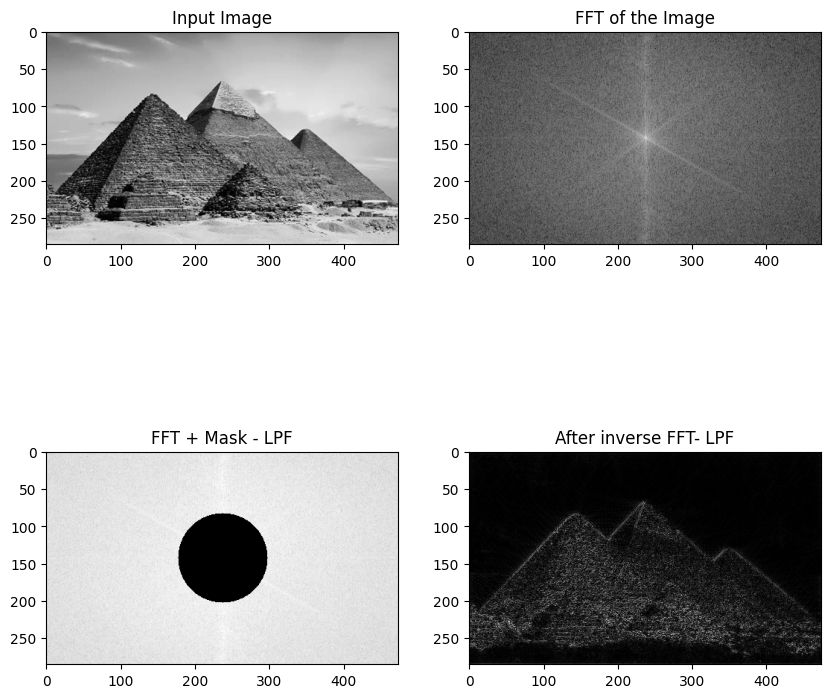

In [36]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img, cmap = 'gray')
ax1.title.set_text('Input Image')

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.title.set_text('FFT of the Image')

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(fshift_mask_mag, cmap = 'gray')
ax3.title.set_text('FFT + Mask - LPF')

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(img_back, cmap = 'gray')
ax4.title.set_text('After inverse FFT- LPF')

plt.show()